In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp

# Problem 1

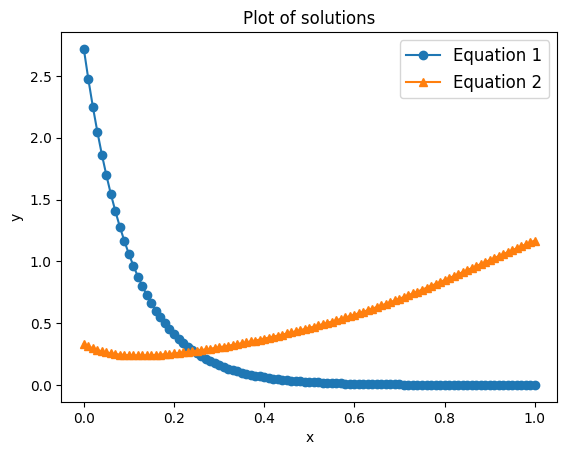

In [ ]:
def backward_euler(f, y0, x0, xf, h):
    x_values = [x0]
    y_values = [y0]
    x = x0

    while x < xf:
        y_prev = y_values[-1]
        x += h
        y_next = y_prev + h * f(x, y_prev)
        y_values.append(y_next)
        x_values.append(x)

    return x_values, y_values

# Define the first initial value problem
def f1(x, y):
    return -9.0 * y

# Define the second initial value problem
def f2(x, y):
    return -20.0*(y-x)**2+2*x

# Set initial conditions and integration parameters
y0_1 = np.e
y0_2 = 1/3
x0 = 0
xf = 1
h = 0.01

# Solve the first initial value problem
x1, y1 = backward_euler(f1, y0_1, x0, xf, h)

# Solve the second initial value problem
x2, y2 = backward_euler(f2, y0_2, x0, xf, h)

# Plot the results
plt.plot(x1,y1,marker='o',label='Equation 1')
plt.plot(x2,y2,marker='^',label='Equation 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of solutions')
plt.legend(loc='upper right', fontsize='large')

plt.show()

#Problem 2

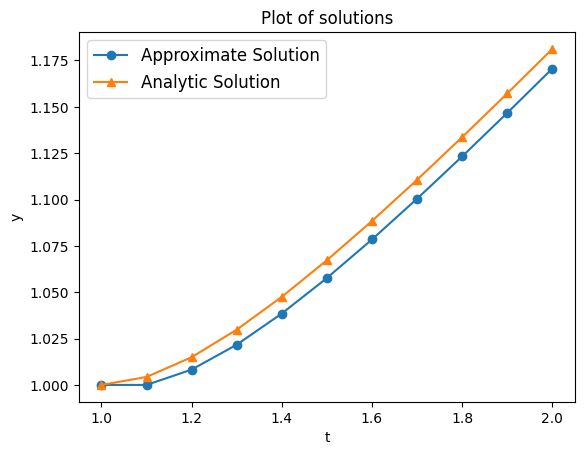

t=1.0  Absolute Error=0.000000  Relative Error=0.000000
t=1.1  Absolute Error=0.004282  Relative Error=0.004263
t=1.2  Absolute Error=0.006688  Relative Error=0.006589
t=1.3  Absolute Error=0.008124  Relative Error=0.007889
t=1.4  Absolute Error=0.009019  Relative Error=0.008610
t=1.5  Absolute Error=0.009594  Relative Error=0.008990
t=1.6  Absolute Error=0.009972  Relative Error=0.009161
t=1.7  Absolute Error=0.010223  Relative Error=0.009204
t=1.8  Absolute Error=0.010392  Relative Error=0.009166
t=1.9  Absolute Error=0.010505  Relative Error=0.009078
t=2.0  Absolute Error=0.010581  Relative Error=0.008957


In [ ]:
# Define the ODE: y' = y/t - (y/t)^2
def f(t, y):
    return y / t - (y / t) ** 2

# Analytical solution
def analytical_solution(t):
    return t / (1 + math.log(t))

# Euler's method
def euler_method(f, t0, y0, h, num_steps):
    t_values = [t0]
    y_values = [y0]
    for _ in range(num_steps):
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1])
        t_values.append(t_next)
        y_values.append(y_next)
    return t_values, y_values

# Parameters
t0 = 1  # Initial t
y0 = 1  # Initial y
h = 0.1  # Step size
num_steps = int((2 - t0) / h)  # Number of steps

# Compute approximate solution using Euler's method
t_values, y_values = euler_method(f, t0, y0, h, num_steps)

# Compute analytical solution values
analytical_y_values = [analytical_solution(t) for t in t_values]

# Calculate absolute error
absolute_error = [abs(analytical_y - approx_y) for analytical_y, approx_y in zip(analytical_y_values, y_values)]

# Calculate relative error
relative_error = [abs((analytical_y - approx_y) / analytical_y) for analytical_y, approx_y in zip(analytical_y_values, y_values)]

# Plot the results
plt.plot(t_values,y_values,marker='o',label='Approximate Solution')
plt.plot(t_values,analytical_y_values,marker='^',label='Analytic Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Plot of solutions')
plt.legend(loc='upper left', fontsize='large')

plt.show()


# Print results
for i in range(len(t_values)):
    print(f"t={t_values[i]:.1f}  Absolute Error={absolute_error[i]:.6f}  Relative Error={relative_error[i]:.6f}")


# Problem 3

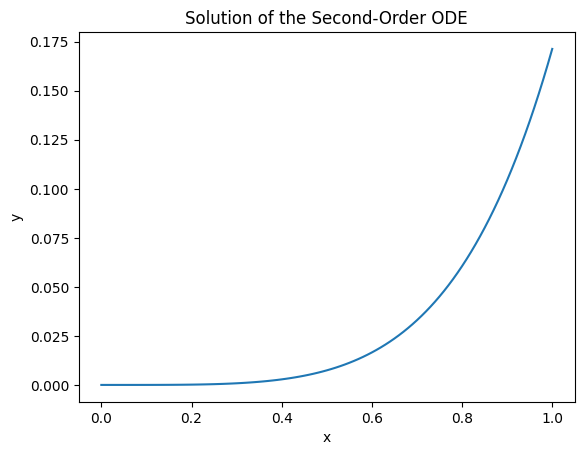

In [ ]:
# Define the function representing the given second-order differential equation
def dydx(x, y, z):
    return z, 2*z - y + x*np.exp(x) - x

# Implement the 4th-order Runge-Kutta method
def runge_kutta(x0, y0, z0, h, xf):
    n = int((xf - x0)/h)
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]

    for i in range(n):
        k1y, k1z = dydx(x_values[-1], y_values[-1], z_values[-1])
        k2y, k2z = dydx(x_values[-1] + h/2, y_values[-1] + h/2*k1y, z_values[-1] + h/2*k1z)
        k3y, k3z = dydx(x_values[-1] + h/2, y_values[-1] + h/2*k2y, z_values[-1] + h/2*k2z)
        k4y, k4z = dydx(x_values[-1] + h, y_values[-1] + h*k3y, z_values[-1] + h*k3z)

        y_new = y_values[-1] + h/6 * (k1y + 2*k2y + 2*k3y + k4y)
        z_new = z_values[-1] + h/6 * (k1z + 2*k2z + 2*k3z + k4z)

        x_values.append(x_values[-1] + h)
        y_values.append(y_new)
        z_values.append(z_new)

    return x_values, y_values

# Define initial conditions and other parameters
x0, xf = 0, 1
y0, z0 = 0, 0
h = 0.01

# Run the Runge-Kutta method to get the solution
x_values, y_values = runge_kutta(x0, y0, z0, h, xf)

# Plot the solution
plt.plot(x_values, y_values)
plt.title("Solution of the Second-Order ODE")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Problem 6

The number of iterations before reaching the tolerence level =  3
For the two extra runs choosing the value of the first derivative to be 2 and 3.


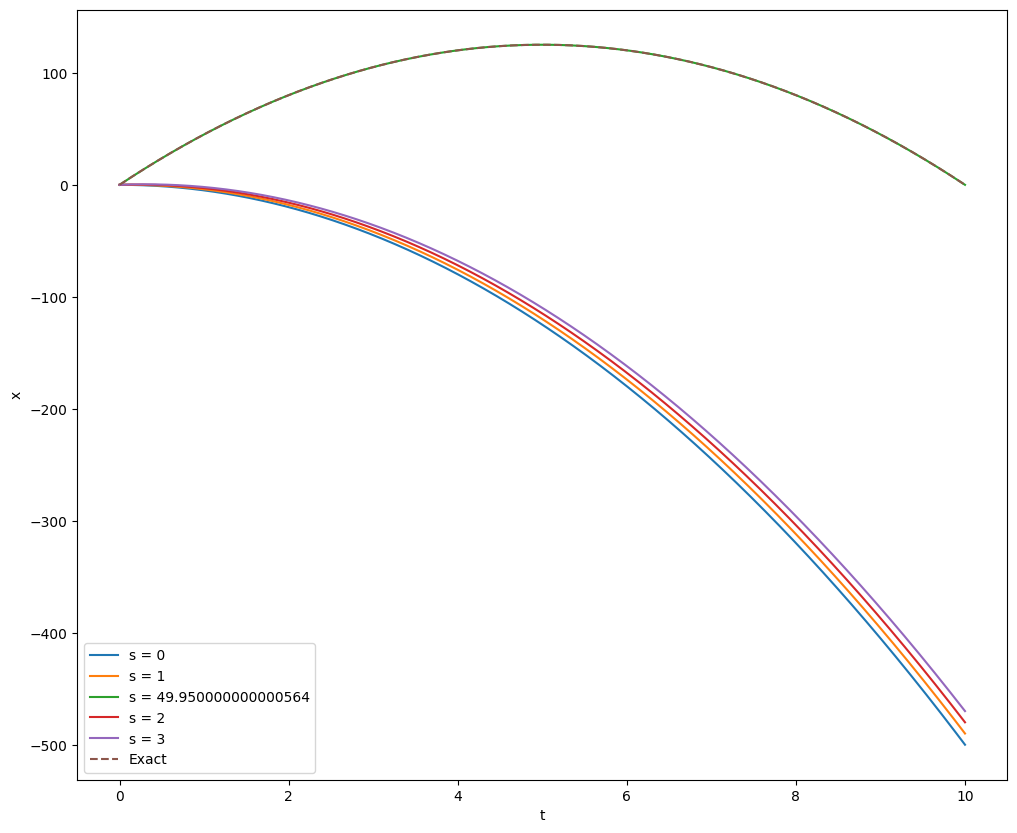

In [10]:
#Defining the Euler method of solving an ODE
def euler(fx,fy,iny,inx,h,N):
    y = [iny]
    x = [inx]
    for i in range(N):
        y.append(y[i]+h*fy())
        x.append(x[i]+h*fx(y[i]))
    return x


def fx(y):
    return y
def fy():
    return -10

x_0 = 0
x_n = 0
t_min = 0
t_max = 10
h = 0.01

N = int((t_max - t_min)/h)

g = 1
tol = 0.01
s0 = 0
s1 = 1

x = [euler(fx,fy,s0,x_0,h,N)]
s = [s0]


#Finding root by Secant method

while(np.abs(s1-s0)>tol):
    x0 = euler(fx,fy,s0,x_0,h,N)
    x1 = euler(fx,fy,s1,x_0,h,N)
    x.append(x1)
    s.append(s1)
    g0 = x_n - x0[-1]
    g1 = x_n -x1[-1]
    s2 = s1 - g1*((s1-s0)/(g1-g0))
    s0 = s1
    s1 = s2

t = [t_min]
for i in range(N):
    t.append(t_min+((i+1)*h))

print("The number of iterations before reaching the tolerence level = ",len(x))
print("For the two extra runs choosing the value of the first derivative to be 2 and 3.")

def real(t):
    sol = []
    for l in range(len(t)):
        sol.append(-5*t[l]**2 + 50*t[l])
    return sol


plt.figure(figsize=(12, 10))
for a in range(len(x)):
    plt.plot(t,x[a],label='s = '+str(s[a]))
plt.plot(t,euler(fx,fy,2,x_0,h,N),label='s = 2')
plt.plot(t,euler(fx,fy,3,x_0,h,N),label='s = 3')
plt.plot(t,real(t),'--',label='Exact')
plt.xlabel('t')
plt.ylabel('x')

plt.legend()
plt.show()

# Problem 7

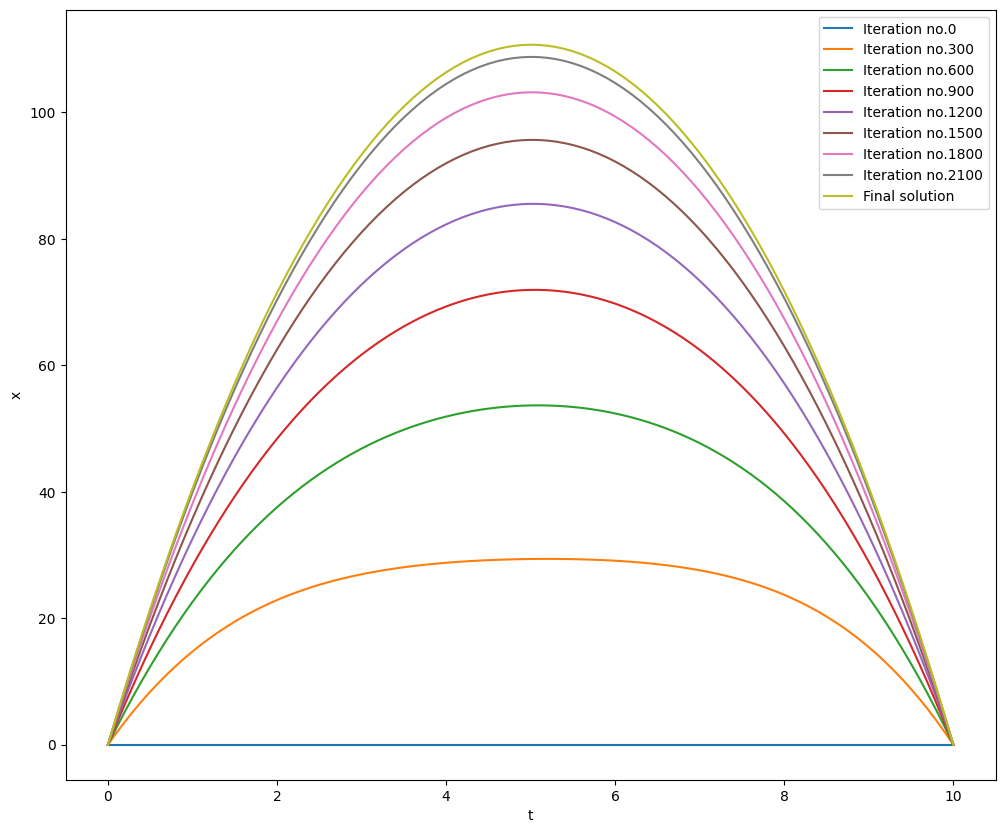

In [9]:
xi = 0
xf = 0
ti = 0
tf = 10
N = 100
x = np.zeros(N+1)
x[0],x[-1] = xi,xf
h = (tf-ti)/N
a = 1
tol = 10**(-1)

t = np.linspace(ti,tf,N+1)
q = 0
plt.figure(figsize=(12, 10))
while(a>tol):
    if (q%300==0):
        plt.plot(t,x,label = 'Iteration no.'+str(q))
    q = q+1
    y = np.copy(x)
    for i in range(1,len(x)-1):
        x[i] = (x[i-1]+x[i+1]+10*h**2)/2
    a = np.linalg.norm(x-y)

plt.plot(t,x,label = 'Final solution')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

# Problem 8

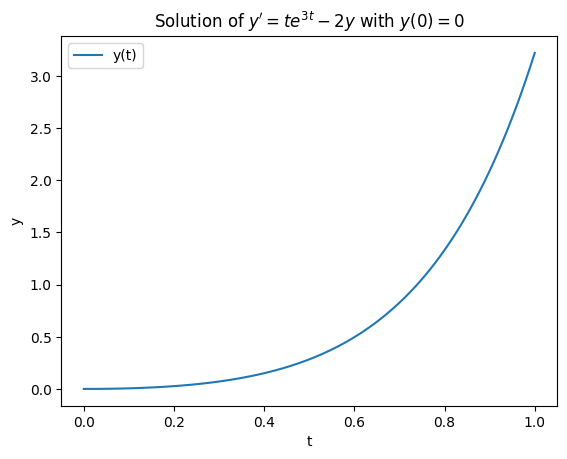

In [ ]:
def fun(t, y):
    return t * np.exp(3*t) - 2*y

t_span = [0, 1]
y0 = [0]

sol = solve_ivp(fun, t_span, y0, t_eval=np.linspace(0, 1, 100))

plt.plot(sol.t, sol.y[0], label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solution of $y' = te^{3t} - 2y$ with $y(0) = 0$")
plt.legend()
plt.show()

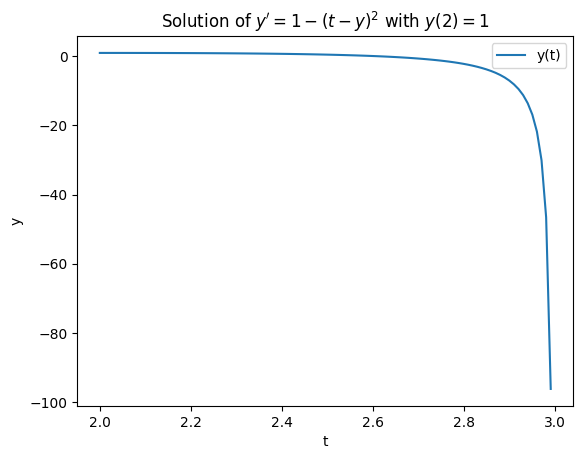

In [ ]:
def fun(t, y):
    return 1-(t-y)**2

t_span = [2, 3]
y0 = [1]

sol = solve_ivp(fun, t_span, y0, t_eval=np.linspace(2, 3, 100))

plt.plot(sol.t, sol.y[0], label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solution of $y' = 1 - (t - y)^2$ with $y(2)=1$")
plt.legend()
plt.show()

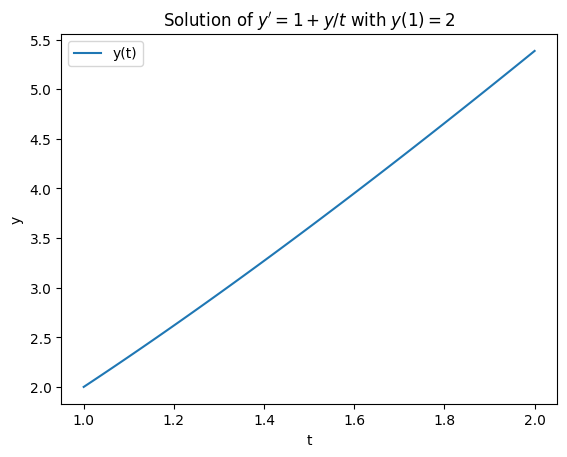

In [ ]:
def fun(t, y):
    return 1 + y/t

t_span = [1, 2]
y0 = [2]

sol = solve_ivp(fun, t_span, y0, t_eval=np.linspace(1, 2, 100))

plt.plot(sol.t, sol.y[0], label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solution of $y' = 1 + y/t$ with $y(1)=2$")
plt.legend()
plt.show()

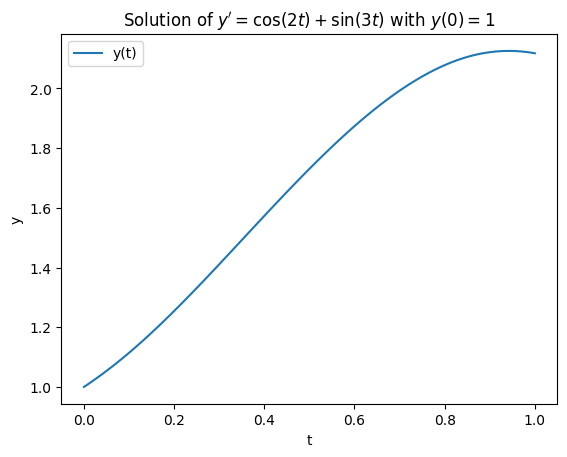

In [ ]:
def fun(t, y):
    return np.cos(2*t) + np.sin(3*t)

t_span = [0, 1]
y0 = [1]

sol = solve_ivp(fun, t_span, y0, t_eval=np.linspace(0, 1, 100))

plt.plot(sol.t, sol.y[0], label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solution of $y'=\cos(2t) + \sin(3t)$ with $y(0)=1$")
plt.legend()
plt.show()

# Problem 9

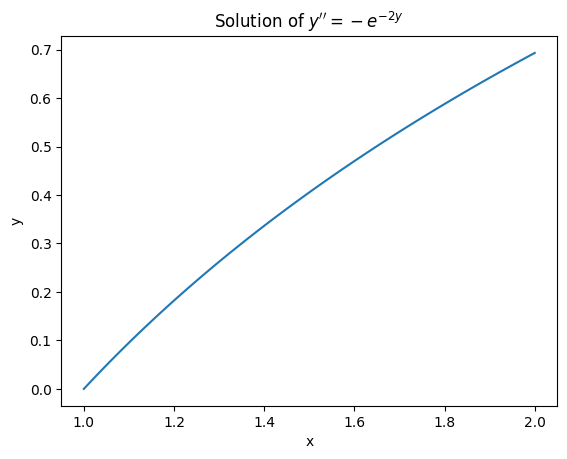

In [ ]:
# Define the differential equation
def ode(x, y):
    return np.vstack((y[1], -np.exp(-2*y[0])))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0], yb[0] - np.log(2)])

# Define the x values
x = np.linspace(1, 2, 100)

# Set initial guess for the solution
y_guess = np.zeros((2, x.size))

# Solve the boundary value problem
sol = solve_bvp(ode, bc, x, y_guess)

# Plot the solution
plt.plot(sol.x, sol.y[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solution of $y''= -e^{-2y}$")
plt.show()

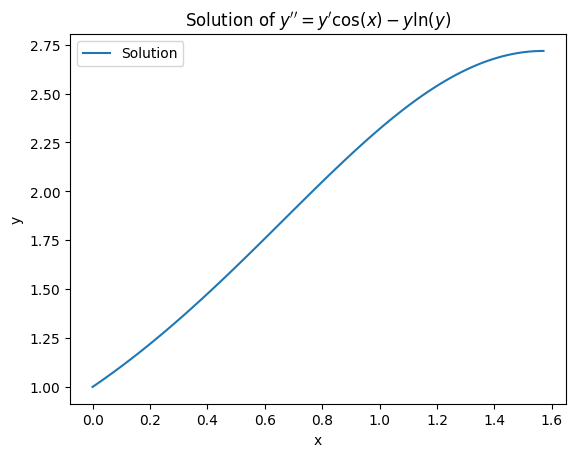

In [ ]:
def bvp_equations(x, y):
    y1, y2 = y
    dydx = [y2, y2 * np.cos(x) - y1 * np.log(y1)]
    return dydx

def boundary_conditions(ya, yb):
    return np.array([ya[0] - 1, yb[0] - np.exp(1)])

# Initial guess for the solution
x = np.linspace(0, np.pi/2, 100)
y_guess = np.array([np.ones_like(x), np.ones_like(x)])

# Solve the boundary value problem
sol = solve_bvp(bvp_equations, boundary_conditions, x, y_guess)

# Plot the solution
x_plot = np.linspace(0, np.pi/2, 100)
y_plot = sol.sol(x_plot)[0]

plt.plot(x_plot, y_plot, label='Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solution of $y''= y'\cos(x) - y\ln(y)$")
plt.legend()
plt.show()

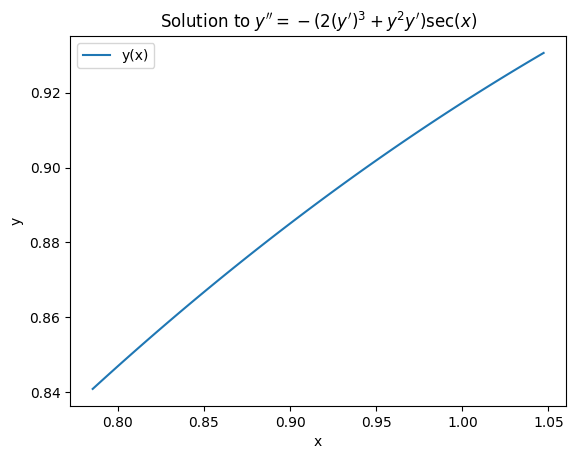

In [ ]:
def fun(x, y):
    y1, y2 = y
    dydx = [y2, -(2*y2**3 + y1**2*y2) / np.cos(x)]
    return dydx

def bc(ya, yb):
    return [ya[0] - 2**(-1/4), yb[0] - (12**0.25)/2]

x_span = np.linspace(np.pi/4, np.pi/3, 100)  # Interval [π/4, π/3]
y_guess = np.zeros((2, x_span.size))  # Initial guess for y1 and y2

# Solve the boundary value problem
sol = solve_bvp(fun, bc, x_span, y_guess)

# Plot the solution
plt.plot(sol.x, sol.y[0], label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solution to $y''=-(2(y')^3+y^2y')\sec(x)$")
plt.legend()
plt.show()

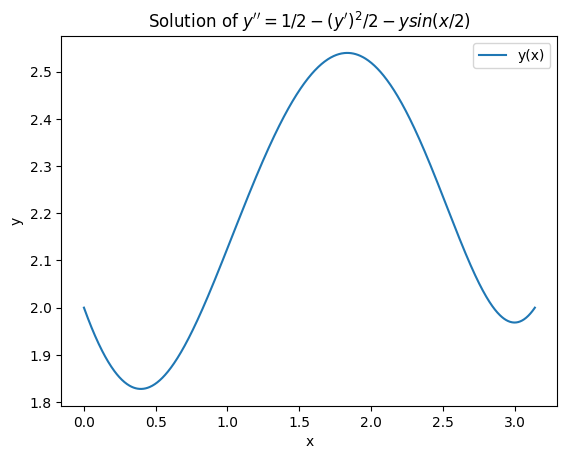

In [ ]:
def fun(x, y):
    return np.vstack((y[1], 0.5 - 0.5 * y[1]**2 - y[0] * np.sin(x / 2)))

def bc(ya, yb):
    return np.array([ya[0] - 2, yb[0] - 2])

x = np.linspace(0, np.pi, 100)
y_guess = np.zeros((2, x.size))
y_guess[0] = 2  # Initial guess for y
y_guess[1] = 0  # Initial guess for y'

sol = solve_bvp(fun, bc, x, y_guess)

plt.plot(sol.x, sol.y[0], label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solution of $y'' = 1/2 - (y')^2/2 - y sin(x/2)$")
plt.legend()
plt.show()

# Problem 10

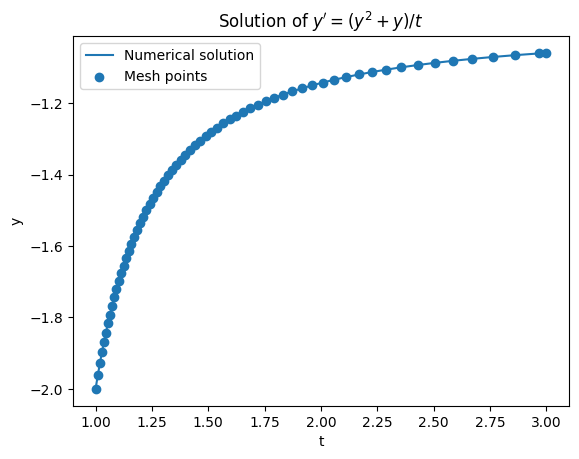

In [ ]:
def f(t, y):
    return (y**2 + y) / t

def rk4_step(t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def adaptive_rk4(t0, y0, t_end, tol):
    t_points = [t0]
    y_points = [y0]
    h = 0.1  # initial step size
    t = t0
    y = y0

    while t < t_end:
        h = min(h, t_end - t)

        # Compute two steps with h/2
        y1 = rk4_step(t, y, h)
        y2 = rk4_step(t + h/2, y1, h)

        # Compute one step with h
        y_new = rk4_step(t, y, 2*h)

        # Error estimation
        error = np.abs(y2 - y_new)

        # Accept the step if error is within tolerance
        if np.max(error) < tol:
            t += h
            y = y2
            t_points.append(t)
            y_points.append(y)

        # Adjust step size
        h = 0.9 * h * (tol / np.max(error))**0.2

    return np.array(t_points), np.array(y_points)

# Initial conditions
t0 = 1
y0 = -2
t_end = 3
tol = 1e-4

# Solve the differential equation
t_points, y_points = adaptive_rk4(t0, y0, t_end, tol)

# Plot the solution
plt.plot(t_points, y_points, label='Numerical solution')
plt.scatter(t_points, y_points, label='Mesh points')
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solution of $y' = (y^2 + y) / t$")
plt.legend()
plt.show()

# Problem 11

In [ ]:
def f(t, x):
    return 1 / (x**2 + t**2)

def runge_kutta_4(t0, x0, h, tf):
    t = t0
    x = x0
    while t < tf:
        k1 = h * f(t, x)
        k2 = h * f(t + h/2, x + k1/2)
        k3 = h * f(t + h/2, x + k2/2)
        k4 = h * f(t + h, x + k3)
        x = x + (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
    return x

t0 = 0
x0 = 1
h = 0.1  # Step size
tf = 3.5e6  # Final time

solution = runge_kutta_4(t0, x0, h, tf)
print("The value of the solution at $t=3.5e6$ is:", solution)

The value of the solution at $t=3.5e6$ is: 2.1448193236539677


# Problem 12

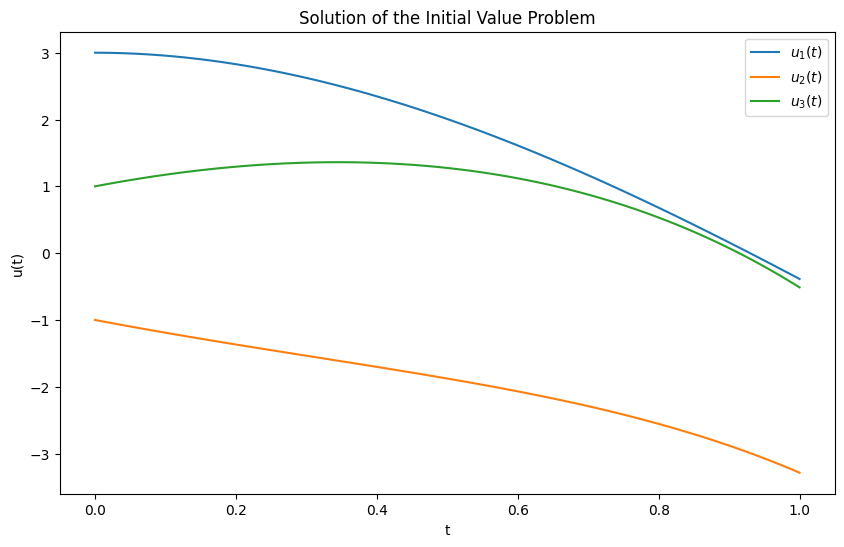

In [ ]:
# Define the differential equations
def f(t, u):
    A = np.array([[1, 2, -2], [0, 1, 1], [1, 2, 0]])
    B = np.array([np.exp(-t), -2*np.exp(-t), np.exp(-t)])
    return np.dot(A, u) + B

# Fourth-order Runge-Kutta method
def runge_kutta4(t, u, dt, f):
    k1 = dt * f(t, u)
    k2 = dt * f(t + dt / 2, u + k1 / 2)
    k3 = dt * f(t + dt / 2, u + k2 / 2)
    k4 = dt * f(t + dt, u + k3)
    return u + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions
t0 = 0
tf = 1
dt = 0.01
u0 = np.array([3, -1, 1])

# Time array
t_values = np.arange(t0, tf + dt, dt)

# Solve using Runge-Kutta method
u_values = [u0]
for t in t_values[:-1]:
    u_values.append(runge_kutta4(t, u_values[-1], dt, f))

u_values = np.array(u_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values, u_values[:, 0], label='$u_1(t)$')
plt.plot(t_values, u_values[:, 1], label='$u_2(t)$')
plt.plot(t_values, u_values[:, 2], label='$u_3(t)$')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Solution of the Initial Value Problem')
plt.legend()
plt.show()

# Problem 14

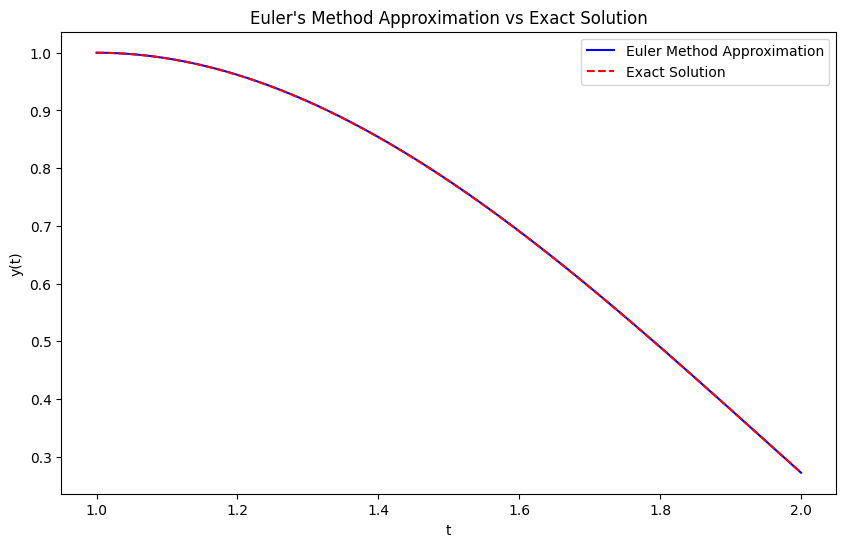

In [ ]:
# Define the differential equation
def f(t, y, yp):
    return (t**3 * np.log(t) +2*t*yp -2*y) / t**2

# Exact solution
def exact_solution(t):
    return 7*t/4 + (t**3/2) * np.log(t) - (3/4) * t**3

# Euler's method
def euler_method(t0, y0, yp0, h, tf):
    t_values = np.arange(t0, tf + h, h)
    y_values = [y0]
    yp_values = [yp0]
    for i in range(1, len(t_values)):
        y_next = y_values[-1] + h * yp_values[-1]
        yp_next = yp_values[-1] + h * f(t_values[i-1], y_values[-1], yp_values[-1])
        y_values.append(y_next)
        yp_values.append(yp_next)
    return t_values, y_values

# Initial conditions and step size
t0 = 1
y0 = 1
yp0 = 0
h = 0.001
tf = 2

# Solve using Euler's method
t_values, y_values = euler_method(t0, y0, yp0, h, tf)

# Calculate exact solution
t_exact = np.linspace(t0, tf, 1000)
y_exact = exact_solution(t_exact)

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, label='Euler Method Approximation', color='blue')
plt.plot(t_exact, y_exact, label='Exact Solution', linestyle='--', color='red')
plt.title("Euler's Method Approximation vs Exact Solution")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()